<a href="https://colab.research.google.com/github/aakashpaul-2/NLP/blob/main/NLP_Pythorch_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
''' 
This project uses LSTM and PYTORCH to create a ham/spam detector
'''

In [ ]:
# imports
import torchtext.data as ttd
import torch
import torch.nn as nn 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from torchtext.vocab import GloVe

In [ ]:
# import dataset
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2021-03-01 23:19:31--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.004s  

2021-03-01 23:19:32 (115 MB/s) - ‘spam.csv’ saved [503663/503663]



In [ ]:
# store as dataframe
df = pd.read_csv("spam.csv", encoding = "ISO-8859-1")

In [ ]:
# view df
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# drop unused column and rename columns
df = df.drop(["Unnamed: 2","Unnamed: 3", "Unnamed: 4"], axis=1)
df.columns = ["labels", "data"]

In [ ]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# mapping lables to catogorical values
df["b_labels"] = df["labels"].map({"ham":0, "spam":1})

In [ ]:
df2 = df[["data", "b_labels"]]

In [ ]:
df2.head()

,data,b_labels
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
# converting df to csv 
df2.to_csv("spam2.csv", index = False)

In [ ]:
# Creating filed objects for pytorch model
# TEXT - input data (for sequence of data, lower case, N*D*T, pre padding)
TEXT = ttd.Field(sequential = True, lower = True, batch_first = True, pad_first = True, tokenize = "spacy")

# Setting the label as the targets into the LABEL object (numerical labels)
LABEL = ttd.Field(sequential = False, use_vocab = False, is_target = True)

In [ ]:
# assiging the csv (for torch text tabular dataset) and labels to the TEXT and LABEL objects created to tokenise
dataset = ttd.TabularDataset(path = "spam2.csv", format = "csv", skip_header = True, fields = [("data",TEXT),("b_labels",LABEL)])

In [ ]:
# Splitting dataset into train and test
train_dataset, test_dataset = dataset.split()

In [ ]:
# assigns unique interger to each token in dataset
TEXT.build_vocab(train_dataset)

In [ ]:
# assigning vocab object
vocab = TEXT.vocab

In [ ]:
# visualise the unique integer assigned to each token
vocab.stoi

defaultdict(<function torchtext.vocab._default_unk_index>,
            {'<unk>': 0,
             '<pad>': 1,
             '.': 2,
             'i': 3,
             'to': 4,
             'you': 5,
             ',': 6,
             '?': 7,
             'a': 8,
             'the': 9,
             '!': 10,
             '...': 11,
             'u': 12,
             'and': 13,
             'is': 14,
             'in': 15,
             'me': 16,
             'my': 17,
             'it': 18,
             'for': 19,
             'your': 20,
             '..': 21,
             'of': 22,
             'do': 23,
             'that': 24,
             'have': 25,
             'call': 26,
             '&': 27,
             'on': 28,
             'now': 29,
             'are': 30,
             'so': 31,
             '2': 32,
             ' ': 33,
             "'s": 34,
             'but': 35,
             ';': 36,
             'not': 37,
             'at': 38,
             'can': 39,
             'be':

In [ ]:
# list of unique tokens
vocab.itos

['<unk>',
 '<pad>',
 '.',
 'i',
 'to',
 'you',
 ',',
 '?',
 'a',
 'the',
 '!',
 '...',
 'u',
 'and',
 'is',
 'in',
 'me',
 'my',
 'it',
 'for',
 'your',
 '..',
 'of',
 'do',
 'that',
 'have',
 'call',
 '&',
 'on',
 'now',
 'are',
 'so',
 '2',
 ' ',
 "'s",
 'but',
 ';',
 'not',
 'at',
 'can',
 'be',
 'or',
 ':',
 'get',
 'will',
 'we',
 "'m",
 'ur',
 'if',
 'just',
 'with',
 "n't",
 'this',
 'nt',
 'no',
 '*',
 'when',
 'how',
 '-',
 'go',
 'up',
 'from',
 '4',
 'ok',
 'lt;#&gt',
 'what',
 ')',
 'all',
 'out',
 'free',
 'know',
 'like',
 'then',
 '"',
 'was',
 'got',
 '/',
 'am',
 'there',
 'good',
 'day',
 'come',
 'he',
 'only',
 'its',
 'love',
 'time',
 'as',
 'did',
 'one',
 'send',
 "'ll",
 'want',
 'text',
 'lor',
 'home',
 'about',
 'by',
 'see',
 'need',
 'n',
 'txt',
 'back',
 'she',
 'going',
 'sorry',
 'today',
 'r',
 'stop',
 'our',
 'da',
 '_',
 'they',
 'hi',
 'take',
 'been',
 'new',
 'still',
 'any',
 'mobile',
 'reply',
 'tell',
 'ca',
 'her',
 'please',
 'week',
 'wel

In [ ]:
# check if gpu is enabled
print(device)

cuda:0


In [ ]:
# batch gradient decent - sort key to ensure during padding each sentences in each batch to be the same size
train_iter, test_iter = ttd.Iterator.splits((train_dataset, test_dataset), sort_key = lambda x: len(x.data), batch_sizes = (32,256), device = device)

In [ ]:
# checking batch shapes for input 
for inputs, targets in train_iter:
  print("inputs:", inputs, "shape", inputs.shape)
  print("targets:", targets, "shape", targets.shape)

inputs: tensor([[   1,    1,    1,  ...,   76,  211,  301],
        [   1,    1,    1,  ..., 3553, 4643, 1854],
        [   1,    1,    1,  ...,   36,  211,    2],
        ...,
        [   1,    1,    1,  ...,   30, 7570,    2],
        [   1,    1,    1,  ...,  117,  404,  167],
        [   1,    1,    1,  ...,   19, 6748,   21]], device='cuda:0') shape torch.Size([32, 88])
targets: tensor([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0], device='cuda:0') shape torch.Size([32])
inputs: tensor([[   1,    1,    1,  ...,   12,   31,  149],
        [   1,    1,    1,  ...,   71,   24,    2],
        [   8,  462,  940,  ...,  254,  950,   73],
        ...,
        [   1,    1,    1,  ...,  615, 5279,   10],
        [   1,    1,    1,  ...,   21,  758,    7],
        [   1,    1,    1,  ...,   45,   39,  275]], device='cuda:0') shape torch.Size([32, 116])
targets: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0

In [ ]:
for inputs, targets in test_iter:
  print("inputs:", inputs, "shape", inputs.shape)
  print("targets:", targets, "shape", targets.shape)

inputs: tensor([[ 25,   5, 739,  ..., 326,   7, 231],
        [ 65,  30,  20,  ..., 483, 800,   7],
        [343,   6, 272,  ...,  20, 616,   2],
        ...,
        [  1,   1,   1,  ...,   1,   1, 619],
        [  1,   1,   1,  ...,   1,   1,  63],
        [  1,   1,   1,  ...,   1,   1, 619]], device='cuda:0') shape torch.Size([256, 7])
targets: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0

In [ ]:
# AUTOREGRESSIVE RNN MODELS
class RNN(nn.Module):
  def __init__(self, n_vocab, embed_dim, n_hidden, n_rnnlayers,n_outputs):
    super(RNN,self).__init__()
    self.V = n_vocab
    self.D = embed_dim
    self.M = n_hidden
    self.L = n_rnnlayers
    self.K = n_outputs

    # embedding layer 
    self.embed = nn.Embedding(self.V, self.D)
    # lstm
    self.rnn = nn.LSTM(input_size=self.D, hidden_size=self.M, num_layers=self.L, batch_first=True)
    # final dense layer
    self.fc = nn.Linear(self.M, self.K)

  def forward(self,X):
    # initial lstm states
    h0 = torch.zeros(self.L, X.size(0),self.M).to(device)
    c0 = torch.zeros(self.L, X.size(0),self.M).to(device)

    # EMBEDDING LAYER - from N * T to N * T * D 
    out = self.embed(X)

    # LSTM LAYER - out N * T * M
    out, _ = self.rnn(out,(h0,c0))

    # MAX POOL - OUT N * M
    out, _ = torch.max(out,1)

    # only h(t) at the final time step ---- N * K
    out = self.fc(out)
    return out

In [ ]:
# run the RNN function
model = RNN(len(vocab), 20, 15, 1, 1)
# Move to GPU
model.to(device)

# Define the loss function and optimizer used for the pytorch model
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_iter, test_iter, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_iter:
      # move data to GPU
      #inputs, targets = inputs.to(device), targets.to(device)
      targets = targets.view(-1,1).float()
      # zero the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, targets)
        
      # Backward and optimize
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    # Get train loss and test loss
    train_loss = np.mean(train_loss) # a little misleading
    
    test_loss = []
    for inputs, targets in test_iter:
      #inputs, targets = inputs.to(device), targets.to(device)
      targets = targets.view(-1,1).float()
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    # Save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss
    
    dt = datetime.now() - t0
    print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
      Test Loss: {test_loss:.4f}, Duration: {dt}')
  
  return train_losses, test_losses

In [ ]:
# call the training function
train_losses, test_losses = batch_gd(
    model, criterion, optimizer, train_iter, test_iter, epochs=20)

Epoch 1/20, Train Loss: 0.0114,       Test Loss: 0.2040, Duration: 0:00:01.428318
Epoch 2/20, Train Loss: 0.0103,       Test Loss: 0.2083, Duration: 0:00:01.433373
Epoch 3/20, Train Loss: 0.0103,       Test Loss: 0.1891, Duration: 0:00:01.416064
Epoch 4/20, Train Loss: 0.0173,       Test Loss: 0.1609, Duration: 0:00:01.414988
Epoch 5/20, Train Loss: 0.0093,       Test Loss: 0.1681, Duration: 0:00:01.429406
Epoch 6/20, Train Loss: 0.0083,       Test Loss: 0.1727, Duration: 0:00:01.383512
Epoch 7/20, Train Loss: 0.0075,       Test Loss: 0.1735, Duration: 0:00:01.389001
Epoch 8/20, Train Loss: 0.0073,       Test Loss: 0.1765, Duration: 0:00:01.391216
Epoch 9/20, Train Loss: 0.0064,       Test Loss: 0.1924, Duration: 0:00:01.396253
Epoch 10/20, Train Loss: 0.0056,       Test Loss: 0.1956, Duration: 0:00:01.393510
Epoch 11/20, Train Loss: 0.0051,       Test Loss: 0.1959, Duration: 0:00:01.418569
Epoch 12/20, Train Loss: 0.0048,       Test Loss: 0.2011, Duration: 0:00:01.404619
Epoch 13/20, 

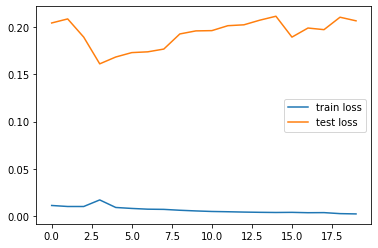

In [ ]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [ ]:
# accuracy for train and test data

n_correct = 0.
n_total = 0.

for inputs, targets in train_iter:
  targets = targets.view(-1,1).float()

  # forwards pass
  outputs = model(inputs)

  # predictions
  predictions = outputs > 0

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct/n_total

n_correct = 0.
n_total = 0.


y_test = []
p_test = []

for inputs, targets in test_iter:
  targets = targets.view(-1,1).float()

  outputs = model(inputs)

  predictions = list((outputs > 0).cpu().numpy())

  y_test += list(targets.cpu().numpy())
  p_test += predictions



In [ ]:
# train and test accuracy --- 94% test accuracy!
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9997, Test acc: 0.9444


In [ ]:
df[df["labels"] == "spam"].size / df.size

0.13406317300789664

In [ ]:
# confusion matrix to visualise results

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


In [ ]:
cm = confusion_matrix(y_test, p_test)
cm

array([[1329,   98],
       [  10,  235]])

Confusion matrix, without normalization
[[1329   98]
 [  10  235]]


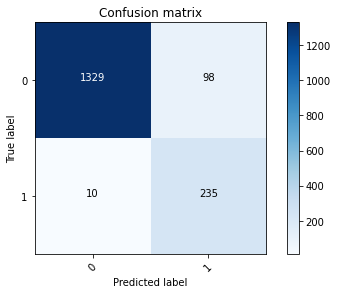

In [ ]:
plot_confusion_matrix(cm, [0,1])

In [ ]:
df[df.labels=="spam"].sample(3)

,labels,data,b_labels
2132,spam,Your B4U voucher w/c 27/03 is MARSMS. Log onto...,1
760,spam,"Romantic Paris. 2 nights, 2 flights from å£79 ...",1
716,spam,+449071512431 URGENT! This is the 2nd attempt ...,1
